# San Diego Burrito Analytics

Scott Cole

23 April 2016

This notebook contains analyses on the burrito ratings in San Diego, including:
* How each metric correlates with one another.

# Default imports

In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style("white")

# Load data

In [4]:
filename="burrito_current.csv"
df = pd.read_csv(filename)
N = df.shape[0]

# Metric correlations

In [5]:
dfcorr = df.corr()

In [6]:
from tools.misc import pearsonp
metricscorr = ['Tortilla','Temp','Meat','Fillings','Meat:filling',
               'Uniformity','Salsa','Synergy','Wrap','overall']
M = len(metricscorr)

Mcorrmat = np.zeros((M,M))
Mpmat = np.zeros((M,M))
for m1 in range(M):
    for m2 in range(M):
        if m1 != m2:
            Mcorrmat[m1,m2] = dfcorr[metricscorr[m1]][metricscorr[m2]]
            Mpmat[m1,m2] = pearsonp(Mcorrmat[m1,m2],N)

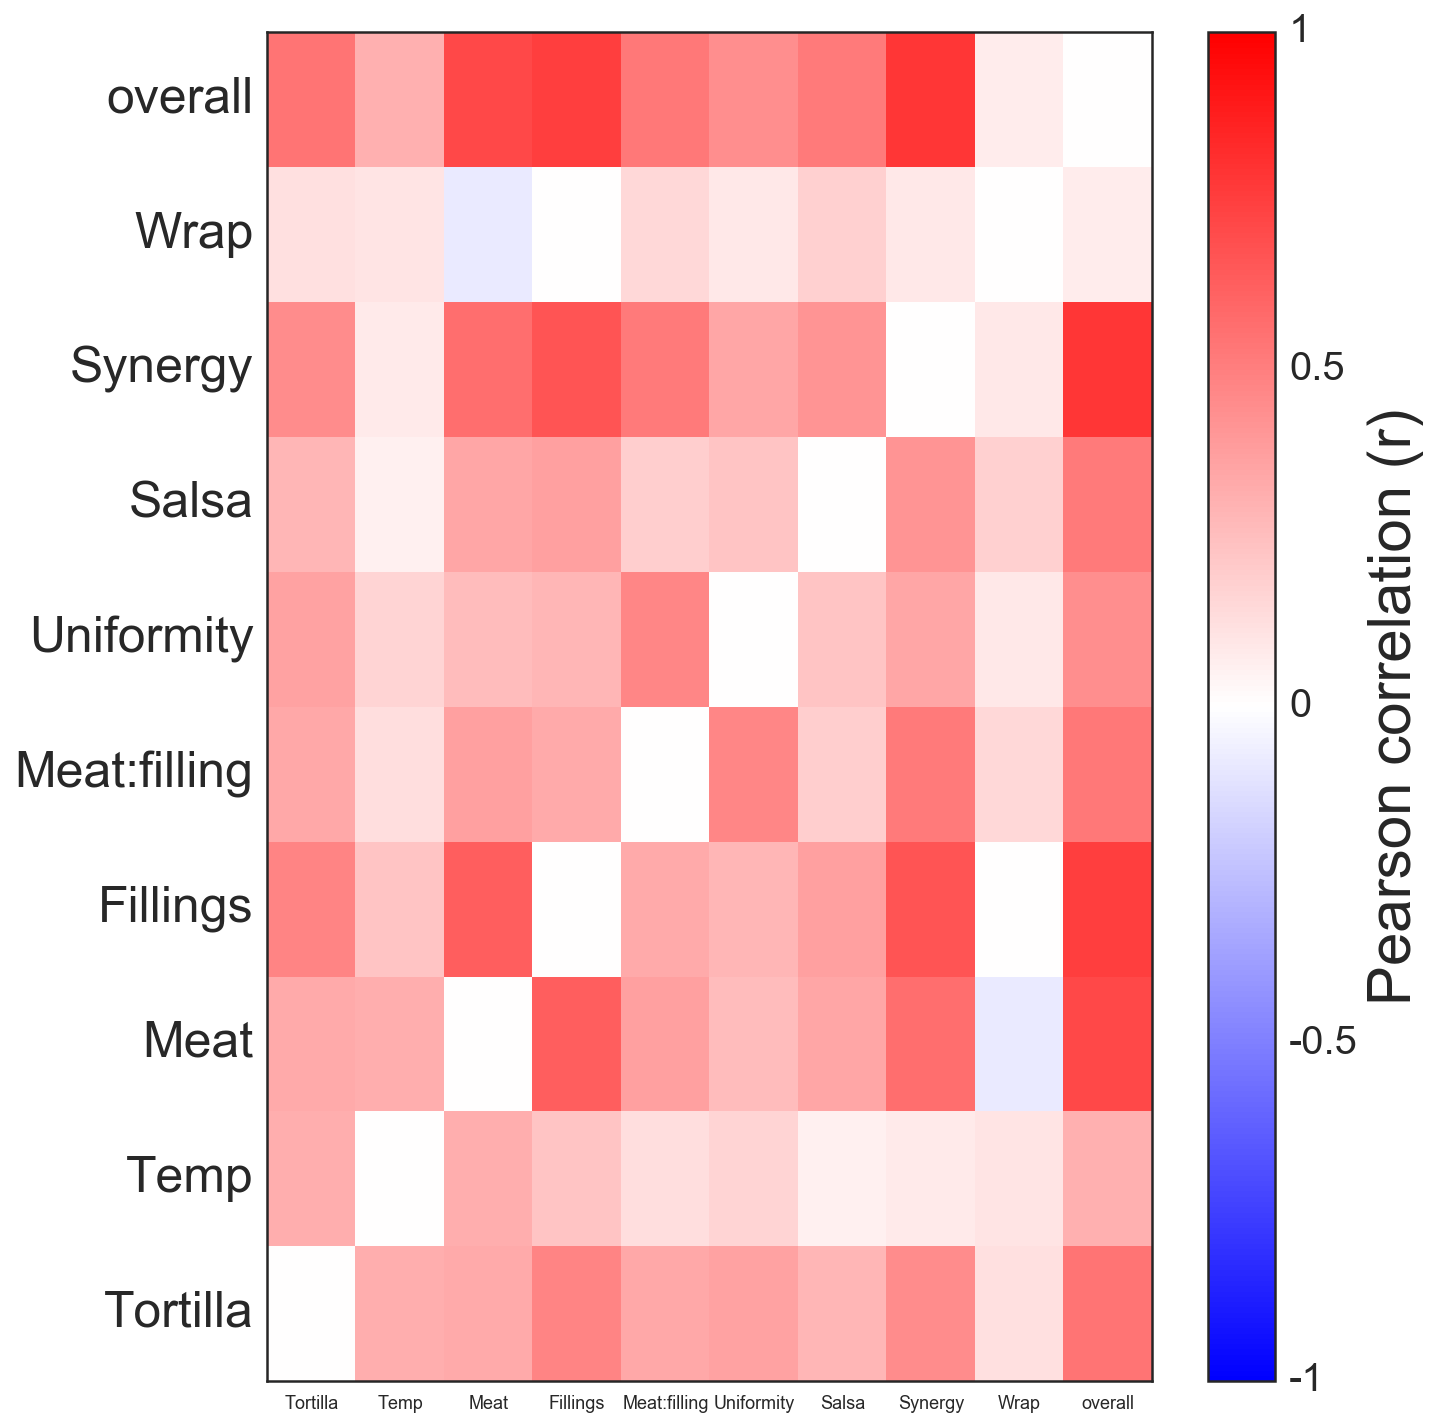

In [7]:
from matplotlib import cm

clim1 = (-1,1)
plt.figure(figsize=(10,10))
cax = plt.pcolor(range(M+1), range(M+1), Mcorrmat, cmap=cm.bwr)
cbar = plt.colorbar(cax, ticks=(-1,-.5,0,.5,1))
cbar.ax.set_ylabel('Pearson correlation (r)', size=30)
plt.clim(clim1)
cbar.ax.set_yticklabels((-1,-.5,0,.5,1),size=20)
#plt.axis([2, M+1, floall[0],floall[-1]+10])
ax = plt.gca()
ax.set_yticks(np.arange(M)+.5)
ax.set_yticklabels(metricscorr,size=25)
ax.set_xticks(np.arange(M)+.5)
ax.set_xticklabels(metricscorr,size=9)
plt.tight_layout()

figname = 'metriccorrmat'
plt.savefig('C:/Users/Scott/Google Drive/qwm/burritos/figs/'+figname + '.png')

In [8]:
Mpmat[9]

array([  4.05424676e-08,   2.97933391e-03,   2.95770683e-15,
         1.17790260e-17,   1.15740913e-07,   1.80017827e-05,
         2.05294252e-07,   1.00195558e-19,   5.02746238e-01,
         0.00000000e+00])

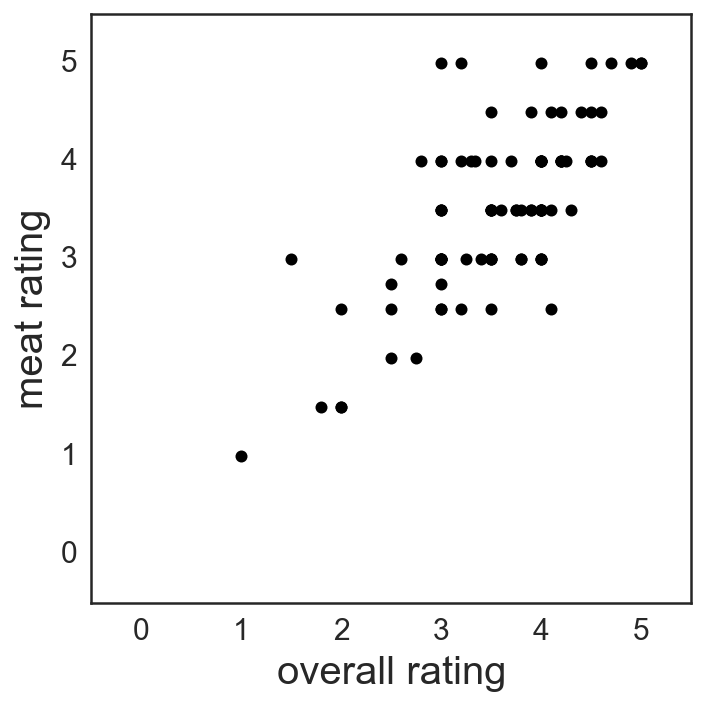

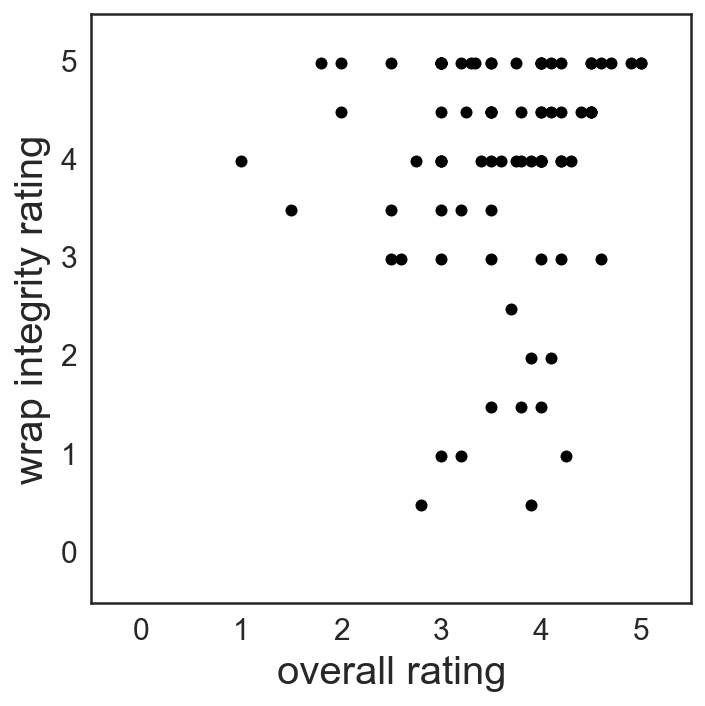

In [9]:
# Visualize some correlations

from tools.plt import scatt_corr
scatt_corr(df['overall'].values,df['Meat'].values,
          xlabel = 'overall rating', ylabel='meat rating', xlim = (-.5,5.5),ylim = (-.5,5.5),xticks=range(6),yticks=range(6))
          #showline = True)
    
scatt_corr(df['overall'].values,df['Wrap'].values,
          xlabel = 'overall rating', ylabel='wrap integrity rating', xlim = (-.5,5.5),ylim = (-.5,5.5),xticks=range(6),yticks=range(6))
          #showline = True)

# Scott's statistics
cumulative function for me
Are my eating habits representative of others? (is Emily's?)
-price, hunger level, etc. difference in means?

Test ideas
* Is there a day of the week of the most burritos / best burritos?
* Peoples whose names start with K rate burritos higher than most
* Do some metric of the burrito need to be improved more than others? (means are lower) Restaurants can stand out by focusing on this metric
* Relationship between ingredients and rating: make a new burrito! Ingredients that correlate most positively with overall